# Cleaning Data

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

### The Data
##### Let's start by reading in the cr_loan.csv file into a pandas dataframe.
##### Then, check the structure and first five rows of the data.

In [2]:
cr_loan = pd.read_csv('/Users/batch/Desktop/python/study/cr_loan.csv')
print(cr_loan.dtypes)
print(cr_loan.head())

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D

### Step1: Check out missing data!

In [3]:
print(cr_loan.columns[cr_loan.isnull().any()])

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


##### For employment length column, replace with average

In [4]:
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
105        

##### Replace the empty values with average

In [5]:
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)
print(cr_loan.columns[cr_loan.isnull().any()])

Index(['loan_int_rate'], dtype='object')


##### With interest rate column, remove them

In [6]:
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index
cr_loan_step1 = cr_loan.drop(indices)
print(cr_loan_step1.columns[cr_loan_step1.isnull().any()])

Index([], dtype='object')


### Step 2: Outlier - Age
##### Create the scatter plot for age and amount

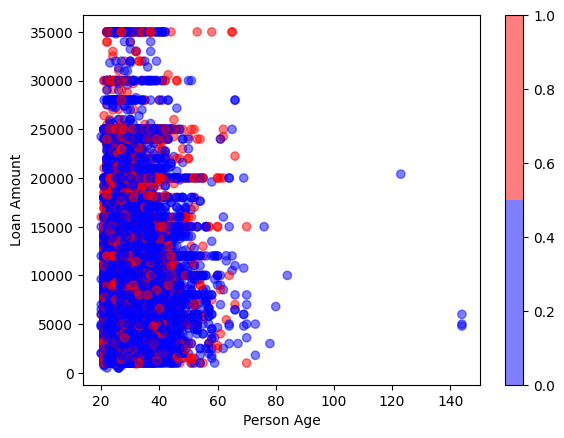

<Figure size 640x480 with 0 Axes>

In [7]:
colors = ["blue","red"]
plt.scatter(cr_loan_step1['person_age'], cr_loan_step1['loan_amnt'],
            c = cr_loan_step1['loan_status'],
            cmap = mcolors.ListedColormap(colors),
            alpha=0.5)
plt.colorbar()
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()
plt.clf()

##### Drop the individuals older than 100 from the data frame and create a new one

In [8]:
cr_loan_step2 = cr_loan_step1.drop(cr_loan_step1[cr_loan_step1['person_age'] > 100].index)

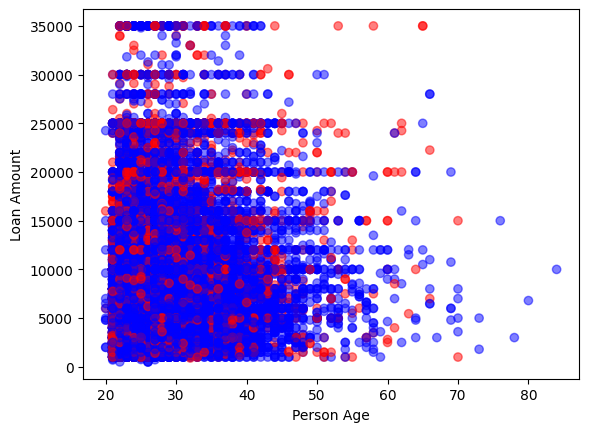

<Figure size 640x480 with 0 Axes>

In [9]:
colors = ["blue","red"]
plt.scatter(cr_loan_step2['person_age'], cr_loan_step2['loan_amnt'],
            c = cr_loan_step2['loan_status'],
            cmap = mcolors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()
plt.clf()

### Step 3: Outlier - Employment length
##### Create the cross table for loan status, home ownership, and the max employment length

In [10]:
print(pd.crosstab(cr_loan_step2['loan_status'],cr_loan_step2['person_home_ownership'],
        values=cr_loan_step2['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


The max of emp_length is 123 is impossoble -> let's remove!

In [11]:
cr_loan_clean = cr_loan_step2.drop(cr_loan_step2[cr_loan_step2['person_emp_length'] > 60].index)

Create the new cross table and include maximun and minimum employment length

In [12]:
print(pd.crosstab(cr_loan_clean['loan_status'],cr_loan_clean['person_home_ownership'],
            values=cr_loan_clean['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0
